In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns    

In [2]:
df=pd.read_csv('salary.csv')

In [3]:
df.head(5)

,age,education.num,capital.gain,hours.per.week,income
0,90,9,0,40,<=50K
1,82,9,0,18,<=50K
2,66,10,0,40,<=50K
3,54,4,0,40,<=50K
4,41,10,0,40,<=50K


In [4]:
df.shape

(32561, 5)

In [8]:
#mapping the income column

df['income_code']=df['income'].map({'<=50K': 0 , '>50K':1})
df.head(10)

,age,education.num,capital.gain,hours.per.week,income,income_code
0,90,9,0,40,<=50K,0
1,82,9,0,18,<=50K,0
2,66,10,0,40,<=50K,0
3,54,4,0,40,<=50K,0
4,41,10,0,40,<=50K,0
5,34,9,0,45,<=50K,0
6,38,6,0,40,<=50K,0
7,74,16,0,20,>50K,1
8,68,9,0,40,<=50K,0
9,41,10,0,60,>50K,1


In [41]:
X=df.iloc[:,:-2].values
y=df.iloc[:,-1].values
y

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [44]:
scaler=StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [45]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report , confusion_matrix , accuracy_score

Text(0, 0.5, 'Error Rate')

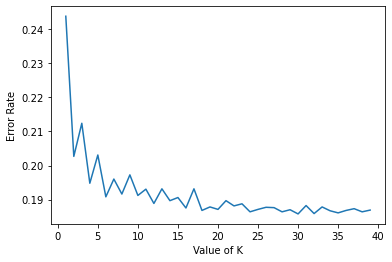

In [46]:
error=[]
for i in range(1,40):
    knn_model= KNeighborsClassifier(n_neighbors=i)
    knn_model.fit(scaled_X_train,y_train)
    pred = knn_model.predict(scaled_X_test)
    err = 1-accuracy_score(pred,y_test)
    error.append(err)
    
plt.plot(range(1,40),error)
plt.xlabel("Value of K")
plt.ylabel("Error Rate")

In [51]:
knn_model=KNeighborsClassifier(n_neighbors=15,metric = 'minkowski', p = 2)
knn_model.fit(scaled_X_train,y_train)
pred = knn_model.predict(scaled_X_test)


In [52]:
accuracy_score(y_test,pred)

0.8093970723717883

In [53]:
confusion_matrix(pred,y_test)

array([[6888, 1340],
       [ 522, 1019]], dtype=int64)

In [50]:
print(classification_report(pred,y_test))

              precision    recall  f1-score   support

           0       0.95      0.81      0.88      8700
           1       0.31      0.68      0.42      1069

    accuracy                           0.80      9769
   macro avg       0.63      0.74      0.65      9769
weighted avg       0.88      0.80      0.83      9769

